### COMP 6315
### Feature Selection en Clasificacion Supervisada: Metodos Wrappers
### Edgar Acuna

### Uso de la libreria mlxtend y de RFE de scikit-learn: Metodos forward y Backward 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
%matplotlib inline

In [28]:
#Leyendo el conjunto de datos pima-diabetes 
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
print(data.shape)
data.head()
#normalizando los datos
data1=data.drop('class',axis=1)
data1_norm=(data1 - data1.min()) / (data1.max() - data1.min())
data1_norm['class']=data['class']

(768, 9)


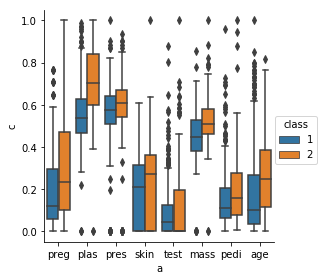

In [29]:
plt.figure(figsize=(20,20))
df_long = pd.melt(data1_norm, "class", var_name="a", value_name="c")
sns.factorplot("a", hue="class", y="c", data=df_long, kind="box")

Comentario: De los boxplots se puede ver que las variables que mas se diferen

In [30]:
#Forward usando el clasificador LDA
y=data['class']
X=data.iloc[:,0:8]
y1=y.as_matrix()
X1=X.as_matrix()
names=X.columns
estimator = LinearDiscriminantAnalysis()

In [31]:
sfs1 = SFS(estimator, k_features=3, forward=True, floating=False, verbose=0,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X1, y1)

In [32]:
sfs1.subsets_

{1: {'avg_score': 0.74609375,
  'cv_scores': array([ 0.74609375]),
  'feature_idx': (1,)},
 2: {'avg_score': 0.77083333333333337,
  'cv_scores': array([ 0.77083333]),
  'feature_idx': (1, 5)},
 3: {'avg_score': 0.77213541666666663,
  'cv_scores': array([ 0.77213542]),
  'feature_idx': (1, 5, 6)}}

Comentario. las mejores tres variables son: plas, mass y pedi

In [33]:
# Forward con Gaussian Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
sfs1 = SFS(clf, k_features=3, forward=True, floating=False, verbose=0,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X1, y1)

In [34]:
sfs1.subsets_

{1: {'avg_score': 0.75, 'cv_scores': array([ 0.75]), 'feature_idx': (1,)},
 2: {'avg_score': 0.76692708333333337,
  'cv_scores': array([ 0.76692708]),
  'feature_idx': (1, 5)},
 3: {'avg_score': 0.76692708333333337,
  'cv_scores': array([ 0.76692708]),
  'feature_idx': (1, 2, 5)}}

Comentario. las 3 mejores variables son: plas,pres y mass

In [35]:
# Backward con Gaussian Bayes
clf = GaussianNB()
sfs1 = SFS(clf, k_features=3, forward=False, floating=False, verbose=0,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X1, y1)
sfs1.subsets_

{3: {'avg_score': 0.76692708333333337,
  'cv_scores': array([ 0.76692708]),
  'feature_idx': (1, 2, 5)},
 4: {'avg_score': 0.77213541666666663,
  'cv_scores': array([ 0.77213542]),
  'feature_idx': (1, 2, 5, 6)},
 5: {'avg_score': 0.77604166666666663,
  'cv_scores': array([ 0.77604167]),
  'feature_idx': (0, 1, 2, 5, 6)},
 6: {'avg_score': 0.7734375,
  'cv_scores': array([ 0.7734375]),
  'feature_idx': (0, 1, 2, 4, 5, 6)},
 7: {'avg_score': 0.76822916666666663,
  'cv_scores': array([ 0.76822917]),
  'feature_idx': (0, 1, 2, 4, 5, 6, 7)},
 8: {'avg_score': 0.76302083333333337,
  'cv_scores': array([ 0.76302083]),
  'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7)}}

In [36]:
#ELigiendo las tres mejores variables con RFE
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X, y)
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), selector.ranking_), names))
# evaluanado el modelo con las 3 features seleccionadas
pred_y = selector.predict(X1)
#Calculando accuracy
acc=(y1==pred_y).sum()
print("Accuracy: %.2f%%" % (acc*100.0/float(len(y1))))

Features sorted by their rank:
[(1.0, 'mass'), (1.0, 'pedi'), (1.0, 'preg'), (2.0, 'plas'), (3.0, 'age'), (4.0, 'pres'), (5.0, 'test'), (6.0, 'skin')]
Accuracy: 69.53%


In [37]:
#Forward usando el clasificador Naive Bayes en Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
y1=y.as_matrix()
X1=X.as_matrix()
features, labels = X.values, y.values
clf = GaussianNB()
sfs1 = SFS(clf, k_features=5, forward=True, floating=False, verbose=0,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X1, y1)
sfs1.subsets_

{1: {'avg_score': 0.58151071025930101,
  'cv_scores': array([ 0.58151071]),
  'feature_idx': (19,)},
 2: {'avg_score': 0.77700112739571592,
  'cv_scores': array([ 0.77700113]),
  'feature_idx': (16, 19)},
 3: {'avg_score': 0.80180383314543402,
  'cv_scores': array([ 0.80180383]),
  'feature_idx': (16, 17, 19)},
 4: {'avg_score': 0.80270574971815112,
  'cv_scores': array([ 0.80270575]),
  'feature_idx': (16, 17, 19, 27)},
 5: {'avg_score': 0.80789177001127399,
  'cv_scores': array([ 0.80789177]),
  'feature_idx': (9, 16, 17, 19, 27)}}